# Assignment 5
------------------
Useful links:
- TA's hints: https://docs.google.com/document/d/1TeKeXpDxjEs6apgr14Z4q1zukh2jla2nOxFauXJ9TNg/edit
- assignment description: https://mycourses.aalto.fi/pluginfile.php/1365972/mod_resource/content/1/Assignment_5.pdf

## Exercise 1
------------------
- Let us assume that your measurement data consists of $n = 20$ observations, the average of which $\tilde{x} = 30$ and variance $s^2 = 20$; this is sufficient statistics for the data.
- A judicious assumption is that measured values are normally distributed.
-  The posterior distribution for the mean $\mu$ and precision $\tau = \dfrac{1}{\sigma^2}$ was found to be of the form

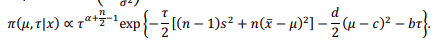

(Lecture 5, p.14)

- In the book (Wilkinson, SMSB), the full conditionals for the parameters of the normal
distribution are “derived” (in fact, given) (Lecture 5, p. 15):

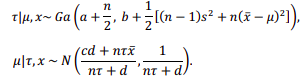

### TODO:
- Implement the Gibbs sampler algorithm and use it to plot the joint distribution for $\mu$ and $\tau = \dfrac{1}{\sigma^2}$ and the marginal distributions for $\mu$ and $\tau$ and $\sigma^2$. 
    - Choose a = b = 1, c = 3, d = 1/100.
    - As initial values (prior means, often used as the starting point for sampling) for mean and precision use $\mu = a / c, \tau = c$.
    - Do 100 000 iterations.
    - Plot joint posterior distribution for $\mu$ and $\tau$, marginal values of $\mu$ vs iteration steps, and marginal distributions for $\mu$ and $\tau$.
        - (In other words, produce results similar (but not identical) to those in the SMSB book: Fig. 9.4 (2nd edition), Fig. 10.4 (3rd edition).)
        - (This is almost a “recipe” assignment, the motivation of which is that after implementing it you’ll understand what Gibbs sampling does and have rough idea what exact solutions it requires.)
        
Start with 2 starting values of mu and tau
first udate mu
then update tau based on mu (conditional distribution)
Loop this!!

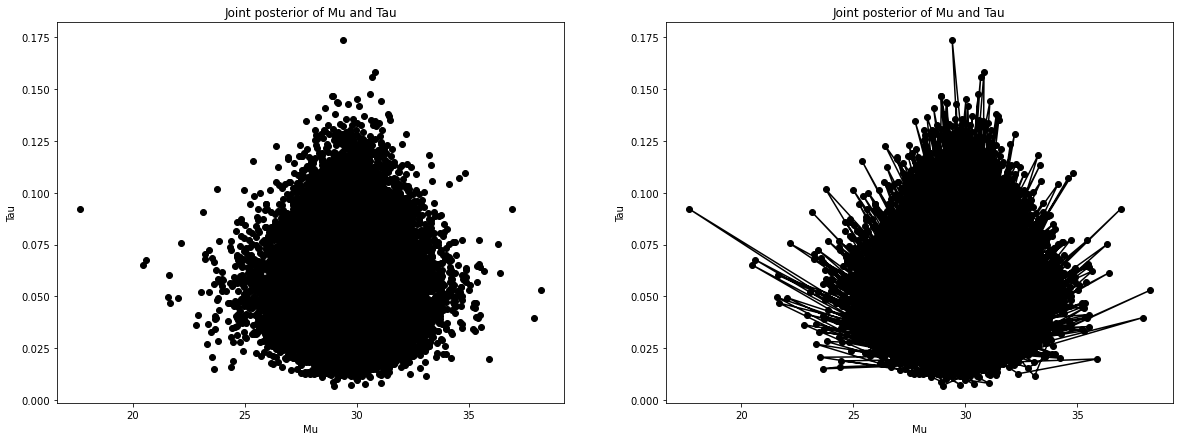

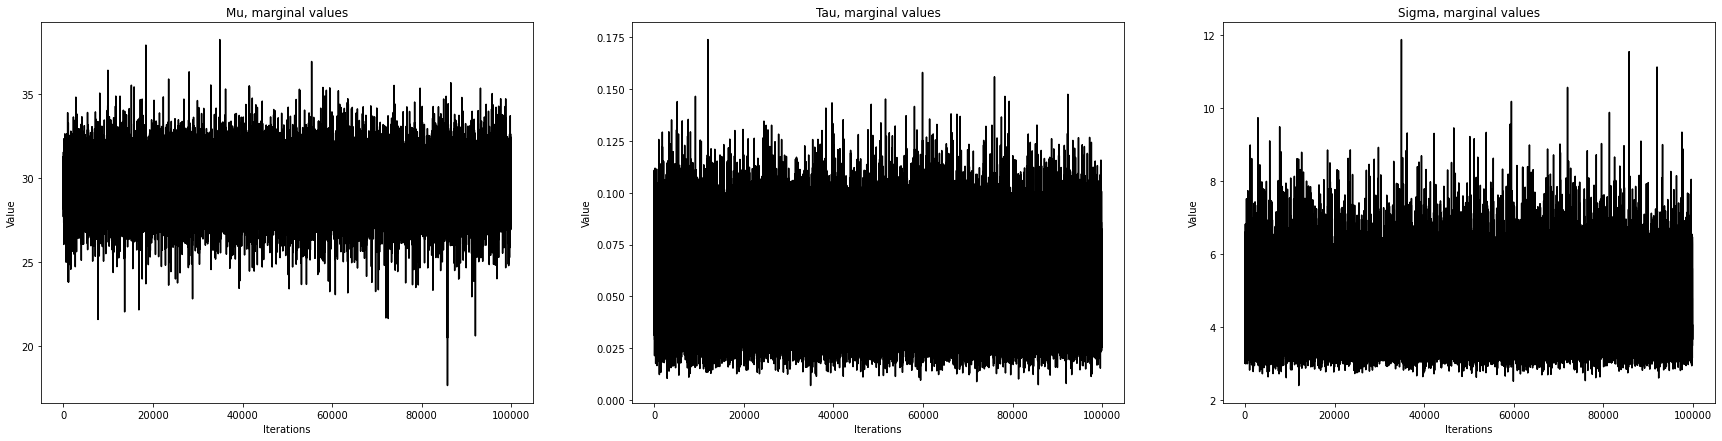

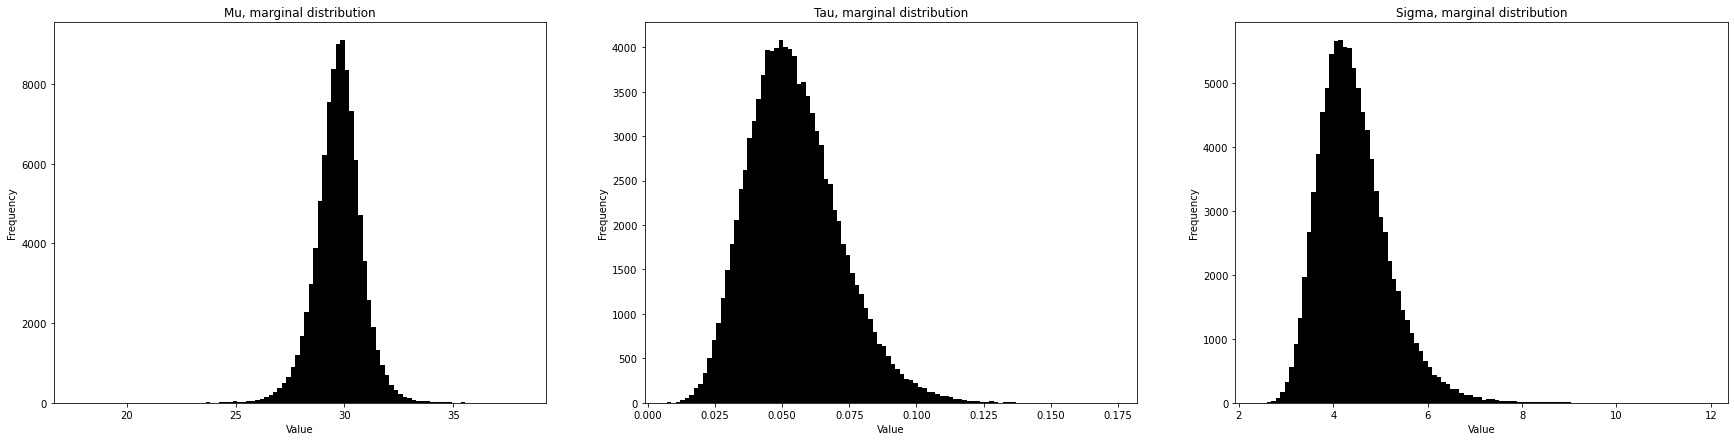

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
seed = 15102020

# Data
n = 20
mean = 30
variance = 20

# parameters / coefficients
sims = 100000
a = 1
b = 1
c = 3
d = 1/100

# Initialize the sample lists
mu_samples = [a / c]
tau_samples = [c]
sigma_samples = [1/np.sqrt(c)]

for i in range(sims):
    
    # parameters for gamma distribution
    alpha = a + (n / 2)
    beta = b + (1/2)*( (n-1)*variance + n*((mean-mu_samples[i])**2))
    
    # With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.
    # (source WIKIPEDIA: Gamma distribution)
    # We want to use k and theta instead of alpha and beta because np.random.gamma takes parameters k and theta.
    # (source https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)
    
    k = alpha
    theta = 1 / beta
    
    # parameters for normal distribution
    mu = (c*d + n*tau_samples[i]*mean) / (n*tau_samples[i] + d)
    sigma = 1 / (n*tau_samples[i] + d)
    
    # Parameters depend on the latest members of the sample lists
    
    # Sample next values
    tau_samples.append(np.random.gamma(k, theta))
    mu_samples.append(np.random.normal(mu, sigma))
    sigma_samples.append(1 / np.sqrt(tau_samples[i+1]))
    
# Ignoring the first 100 samples as warm-up/burn-in period. Usually,
# warmup period is longer (e.g. first half of the total iterations are
# discarded).
# (During this period the random steps taken by the algorithm do not
# yet represent the target distribution.
tau_samples = tau_samples[100:]
mu_samples = mu_samples[100:]
sigma_samples = sigma_samples[100:]

# JOINT POSTERIOR DISTRIBUTIONS

fig1 = plt.figure(figsize = (20, 7));

ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

ax1.plot(mu_samples, tau_samples, 'ko')
ax1.set_title("Joint posterior of Mu and Tau")
ax1.set_xlabel("Mu")
ax1.set_ylabel("Tau")

ax2.plot(mu_samples, tau_samples, 'k-')
ax2.plot(mu_samples, tau_samples, 'ko')
ax2.set_title("Joint posterior of Mu and Tau")
ax2.set_xlabel("Mu")
ax2.set_ylabel("Tau")

fig1.show()


# MARGINAL VALUES

fig2 = plt.figure(figsize=(30,7));

ax1 = fig2.add_subplot(131)
ax2 = fig2.add_subplot(132)
ax3 = fig2.add_subplot(133)

ax1.plot(mu_samples, 'k')
ax1.set_title("Mu, marginal values")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Value")

ax2.plot(tau_samples, 'k')
ax2.set_title("Tau, marginal values")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Value")

ax3.plot(sigma_samples, 'k')
ax3.set_title("Sigma, marginal values")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("Value")

fig2.show()


# MARGINAL DISTRIBUTIONS

fig3 = plt.figure(figsize=(30,7));

ax1 = fig3.add_subplot(131)
ax2 = fig3.add_subplot(132)
ax3 = fig3.add_subplot(133)

ax1.hist(mu_samples, bins = 100, color='black')
ax1.set_title("Mu, marginal distribution")
ax1.set_xlabel("Value")
ax1.set_ylabel("Frequency")

ax2.hist(tau_samples, bins = 100, color='black')
ax2.set_title("Tau, marginal distribution")
ax2.set_xlabel("Value")
ax2.set_ylabel("Frequency")

ax3.hist(sigma_samples, bins = 100, color='black')
ax3.set_title("Sigma, marginal distribution")
ax3.set_xlabel("Value")
ax3.set_ylabel("Frequency")

fig3.show()